MySQL connection is closed


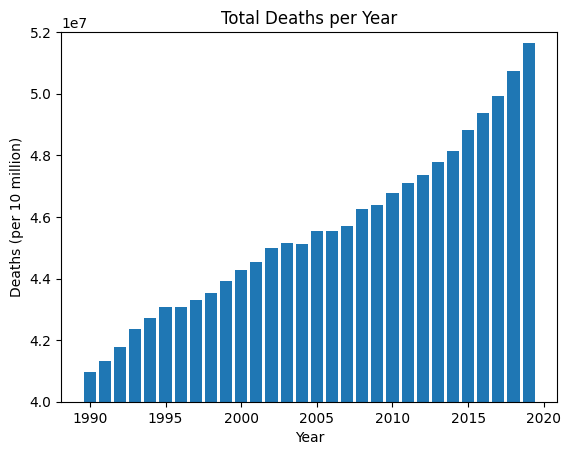

In [186]:
import mysql.connector
from mysql.connector import Error
import pandas as pd
import matplotlib.pyplot as plt

try:
    connection = mysql.connector.connect(host='localhost', database='cs306project', user='root', password='password')

    cursor = connection.cursor()
    totalYearDeaths = cursor.execute("SELECT * FROM TOTALYEARDEATHS")
    df = pd.DataFrame(cursor.fetchall())
    df.columns = cursor.column_names    

except Error as e:
    print("Error while connecting to MySQL", e)

finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("MySQL connection is closed")

x = df['Year']
y = df['totalDeaths']
plt.bar(x, y)
plt.title('Total Deaths per Year')
plt.xlabel('Year')
plt.ylabel('Deaths (per 10 million)')
plt.savefig("yearDeaths.png", format="png", dpi=2000)
plt.ylim(ymin = 40000000, ymax = 52000000)
plt.show()

MySQL connection is closed


C:\Users\tamta\AppData\Local\Temp\ipykernel_39880\3066875300.py:27: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


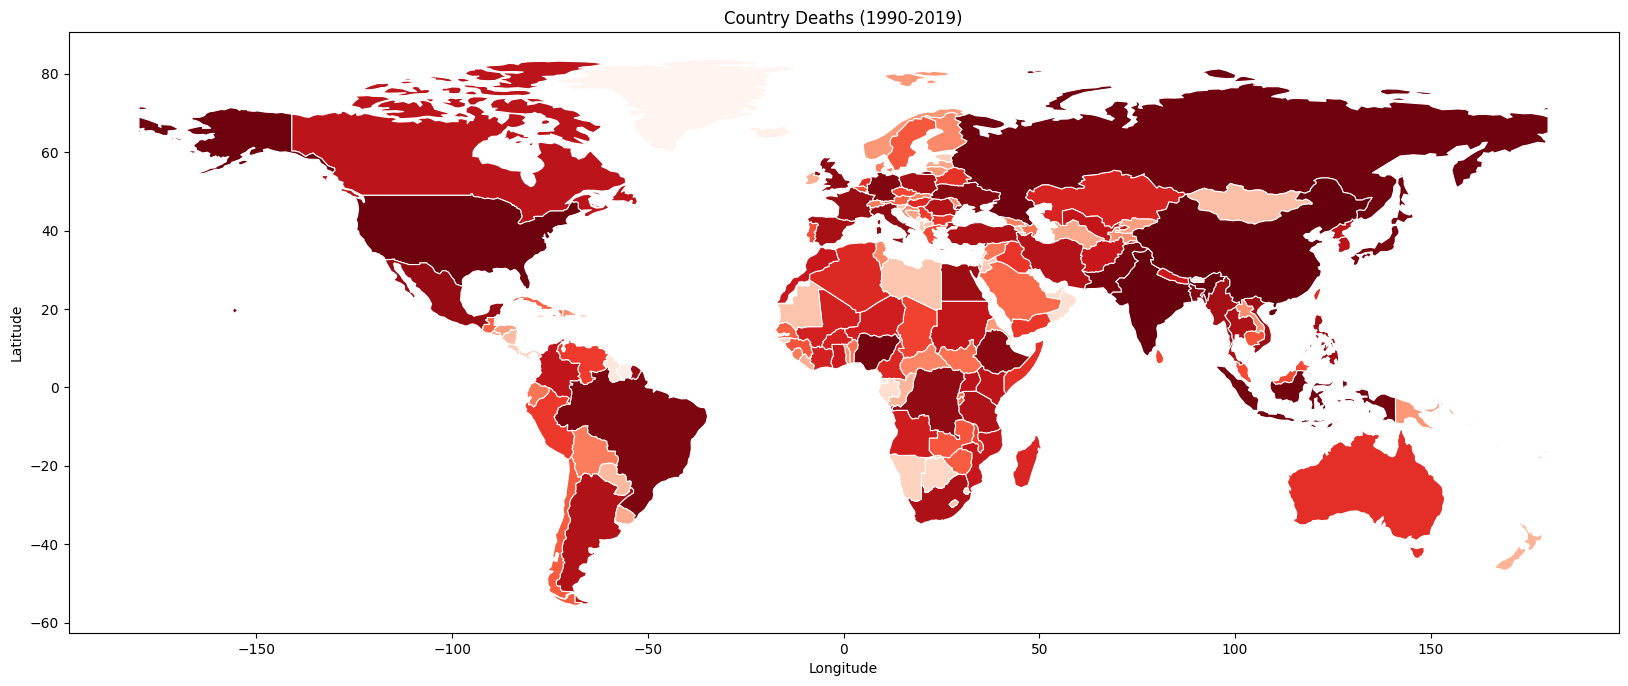

In [2]:
import mysql.connector
from mysql.connector import Error
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import geopandas as gpd

try:
    connection = mysql.connector.connect(host='localhost', database='cs306project', user='root', password='password')

    cursor = connection.cursor()
    totalYearDeaths = cursor.execute("SELECT * FROM TOTALCOUNTRYDEATHS")
    df = pd.DataFrame(cursor.fetchall())
    df.columns = cursor.column_names    

except Error as e:
    print("Error while connecting to MySQL", e)

finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("MySQL connection is closed")


#I have borrowed the code from fellow team member Safwan Yasin
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map with your data
merged_data = world_map.merge(df, left_on='iso_a3', right_on='countryCode', how='left')

# Plot the scatter map
fig, ax = plt.subplots(figsize=(20, 10))
merged_data.plot(column='totalDeaths', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='1', legend=False)

# Set plot title and axis labels
plt.title('Country Deaths (1990-2019)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.savefig("countryDeaths.png", format="png", dpi=2000)
# Show the plot
plt.show()

MySQL connection is closed


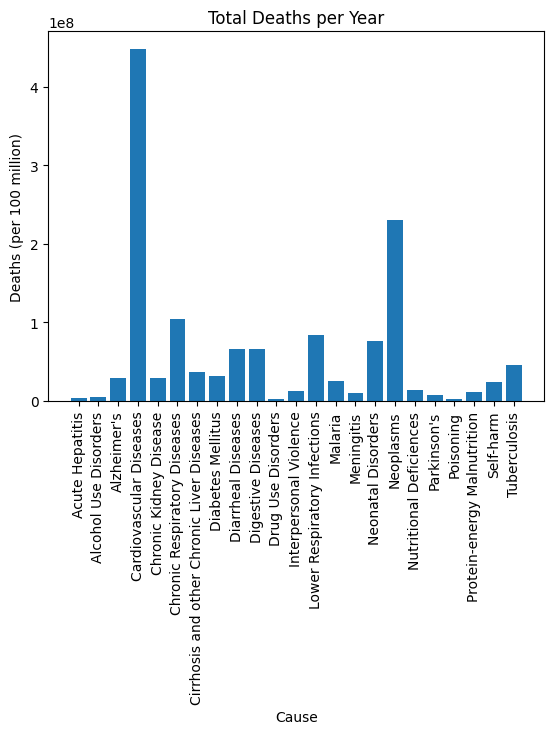

In [182]:
import mysql.connector
from mysql.connector import Error
import pandas as pd
import matplotlib.pyplot as plt

try:
    connection = mysql.connector.connect(host='localhost', database='cs306project', user='root', password='password')

    cursor = connection.cursor()
    totalYearDeaths = cursor.execute("SELECT * FROM TOTALDEATHSBYCAUSE")
    df = pd.DataFrame(cursor.fetchall())
    df.columns = cursor.column_names    

except Error as e:
    print("Error while connecting to MySQL", e)

finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("MySQL connection is closed")

df.sort_values(by=['totalDeaths'])

x = df['cause']
y = df['totalDeaths']
#figure(figsize=(85,10))
plt.bar(x, y)
plt.title('Total Deaths per Year')
plt.xlabel('Cause')
plt.ylabel('Deaths (per 100 million)')
plt.xticks(rotation = 90)
plt.savefig("deathsBarPlot.png", format="png", dpi=2000)
#plt.ylim(ymin = 40000000, ymax = 52000000)
plt.show()